# Author : Ahmed Khaled

### The Sparks Foundation Data Science Internship
- Exploratoy Analysis on the samplesuperstore dataset.

### *************************************************************************************

## Solution Roadmap
1. Importing the necessary packages
2. Loading the dataset
3. Descriptive statistics
4. Visualizing the dataset
5. Splitting the data
6. Preprocessing
7. Model Comparison
8. Model Creation
9. Model Evaluation

In [113]:
import numpy as np  # for Linear Algebra Manipulation
import pandas as pd  # for dataframe Manipulation
import matplotlib.pyplot as plt  # for Data Visualization
import seaborn as sns
import warnings

sns.set(rc={"figure.figsize":(10, 4)}) #width=10, #height=4
warnings.filterwarnings('ignore')

In [114]:
path = 'SampleSuperstore.csv'  # Path of the CSV file on the local machine

df = pd.read_csv(path)  # read_csv function to read the dataset
df.head()  # printing the first five rows of the dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Some Descriptive Statistics
- df.info()  for some information about the dataset
- df.shape  To show how many rows and columns are in the dataset.
- df.describe()  (numerical columns) for the mean and the 3 quartiles of each column and also the max and min values in each column.
- df.describe()  (categorical columns) for the count, uniue, top and freq 
- df.isnull().sum()  To see if there is any missing values in the dataset.
- df.skew()  To see how the data is skewed.

In [115]:
df.shape  # The shape of the dataset.

(9994, 13)

In [116]:
df.info()  # Some Info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [117]:
df.select_dtypes(exclude='object').describe()  # Describe for numerical Columns.

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [118]:
df.select_dtypes(exclude=['int64', 'float64']).describe()  # Describe for Categorical Columns

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [119]:
df.isnull().sum()  # how many null values in each column

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [120]:
df.skew()  # The Skeweness of the data

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

### Some Visualization about the dataset
- Histogram Plots to show the Discrete Distribution.
- Density Plots to show the Contiuous Distribution.
- Bar Plots are used in data comparison two entities.
- Scatter Plots comparing the data variables to determine the relationship between dependant and independent variables.
- Pie Charts are used to represent the proportional data where each slice of pie represents a category.

#### - Displaying the Distribution of each column.

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

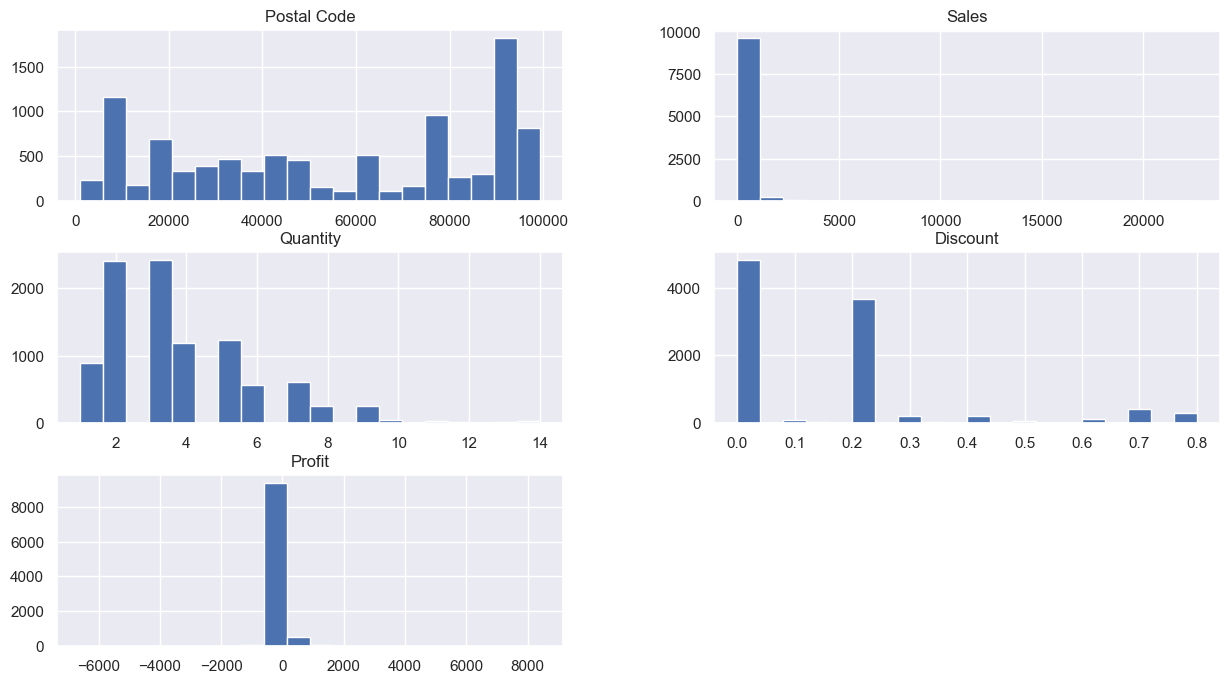

In [121]:
df.hist(bins=20, figsize=(15, 8))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

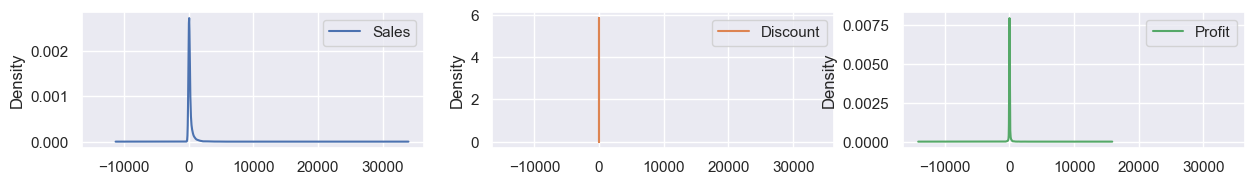

In [122]:
continuous_cols = ['Sales', 'Discount', 'Profit']
df[continuous_cols].plot(kind='density', subplots=True, sharex=True, figsize=(15, 6), layout=(3, 3))

<AxesSubplot:ylabel='Density'>

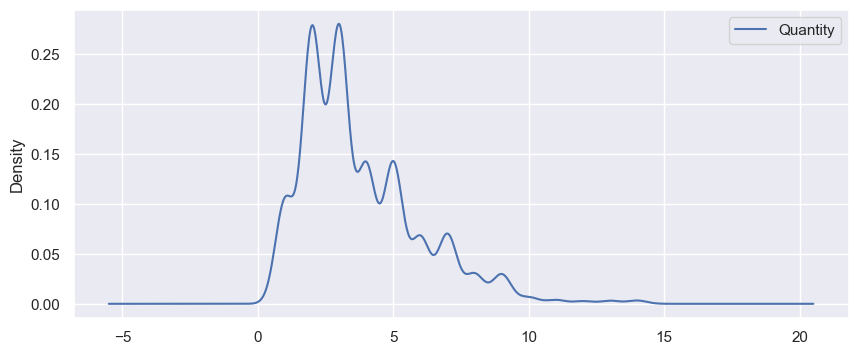

In [123]:
discrete_cols = ['Quantity']
df[discrete_cols].plot(kind='density')

#### - Some Comparision between the categorical columns
- The Technology stuff give a higher Sales value.

<AxesSubplot:xlabel='Category', ylabel='Sales'>

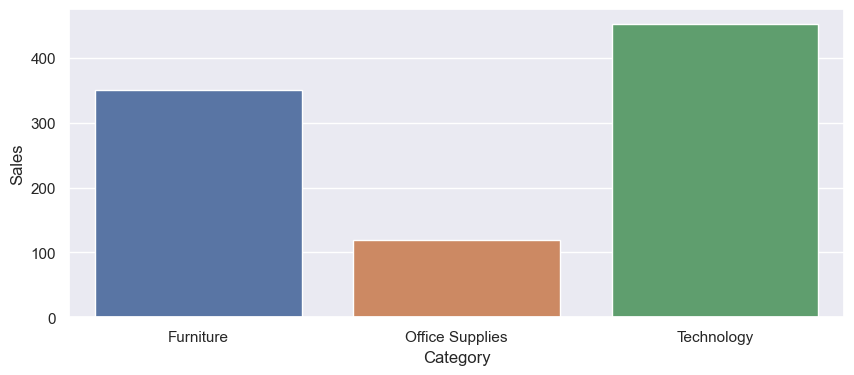

In [124]:
sns.barplot(data=df, x='Category', y='Sales', ci=None)

- The higher the sales the higher the profit ( kinda logic but needed a proof :) )
- As the correlation between those two colums is a positive number.

0.4790643497377055

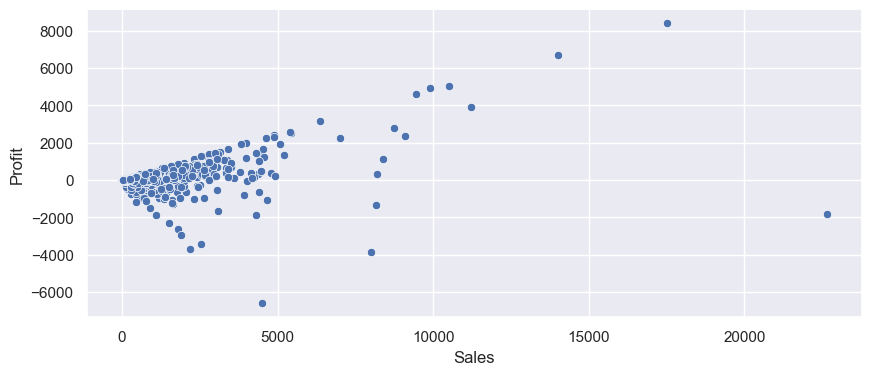

In [125]:
sns.scatterplot(data=df, x='Sales', y='Profit')

df['Sales'].corr(df['Profit'])

### **Let's see what the facors of getting a high profit.**

- Very easy to see that the Standard Class saves us mony so we have higher profit and sales.

                    Sales    Profit
Ship Mode                          
First Class      351428.0   48970.0
Same Day         128363.0   15892.0
Second Class     459194.0   57447.0
Standard Class  1358216.0  164089.0


<AxesSubplot:xlabel='Ship Mode'>

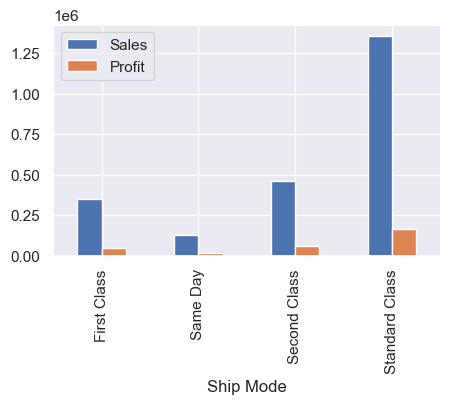

In [126]:
ship_mode_grop = df.groupby('Ship Mode')[['Sales', 'Profit']].agg('sum')
print(ship_mode_grop.agg('round'))
ship_mode_grop.plot(kind='bar', figsize=(5, 3))

- first grouping the data by the Segnents to see which segment give a higher Profit and visualize it.
- we can easily see that Consumer segment gives the higher profit.

                 Sales    Profit
Segment                         
Consumer     1161401.0  134119.0
Corporate     706146.0   91979.0
Home Office   429653.0   60299.0


<AxesSubplot:xlabel='Segment'>

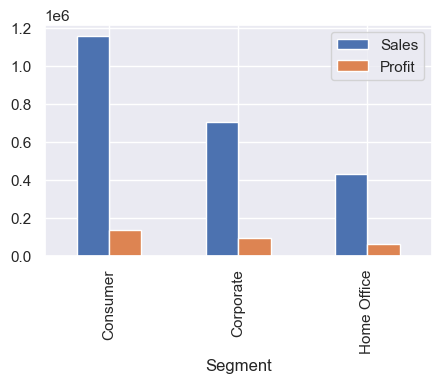

In [127]:
seg_grop = df.groupby('Segment')[['Sales', 'Profit']].agg('sum')
print(seg_grop.agg('round'))
seg_grop.plot(kind='bar', figsize=(5, 3))

- Seems that the West and East Region have can give us higher Profit.

                 Sales    Profit
Segment                         
Consumer     1161401.0  134119.0
Corporate     706146.0   91979.0
Home Office   429653.0   60299.0


<AxesSubplot:xlabel='Region'>

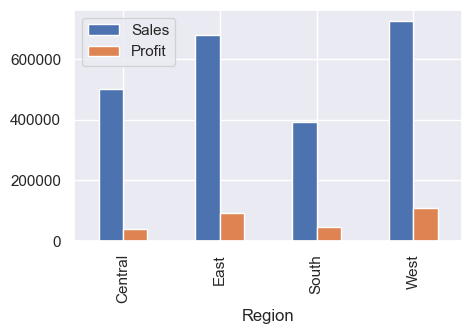

In [128]:
reg_grop = df.groupby('Region')[['Sales', 'Profit']].agg('sum')
print(seg_grop.agg('round'))
reg_grop.plot(kind='bar', figsize=(5, 3))

- We can easily see the lower and higher states with profit .
- New York and California have the highest profit value among all the states.
- Texas, Ohio have the lowest profit value.

                 Sales    Profit
Segment                         
Consumer     1161401.0  134119.0
Corporate     706146.0   91979.0
Home Office   429653.0   60299.0


<AxesSubplot:xlabel='State'>

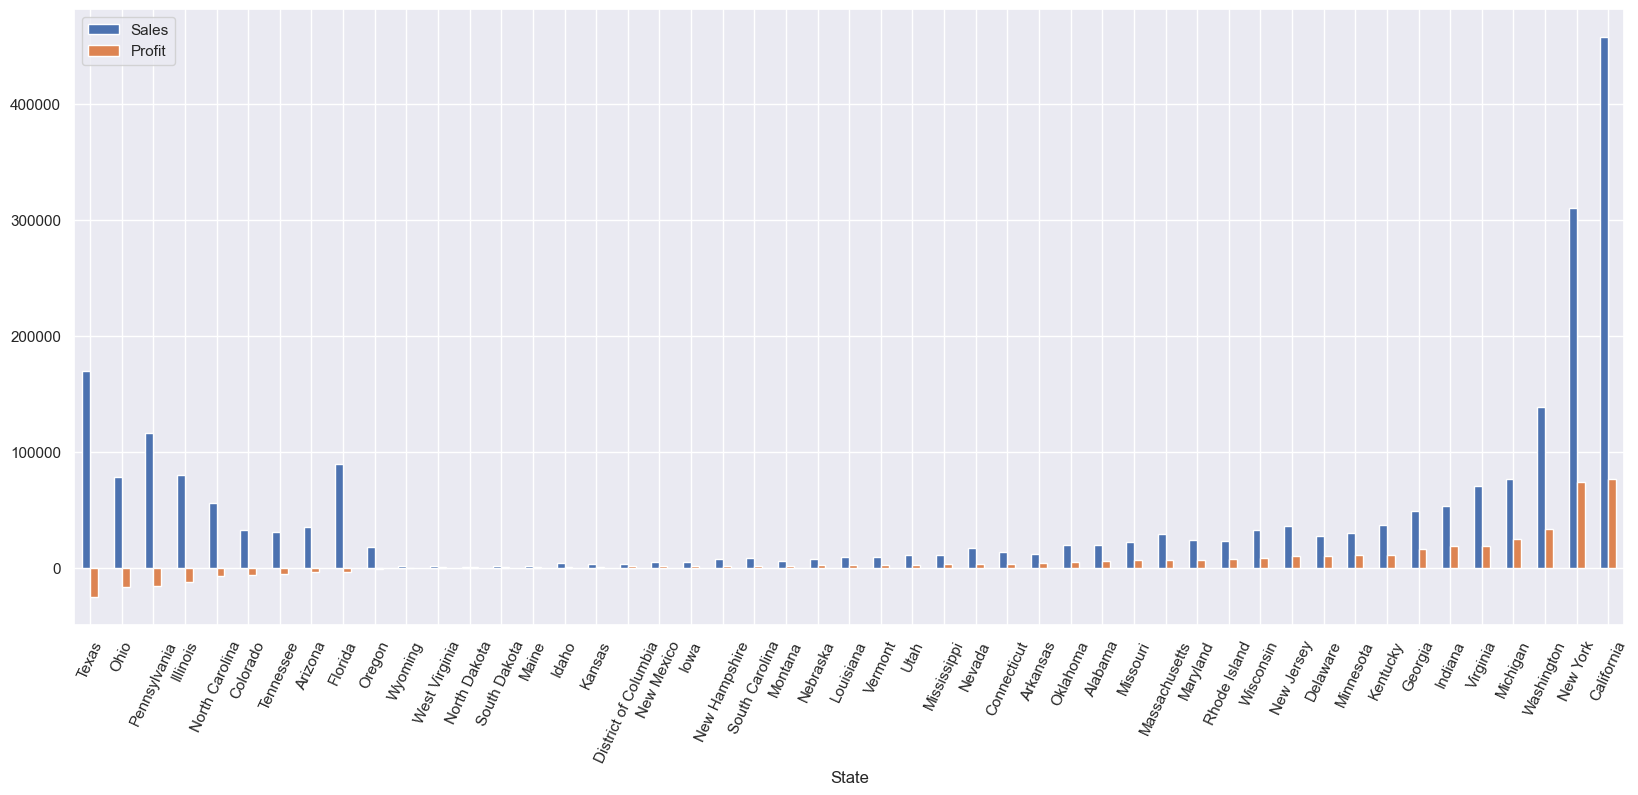

In [129]:
state_grop = df.groupby('State')[['Sales', 'Profit']].agg('sum').sort_values(by='Profit')
print(seg_grop.agg('round'))
state_grop.plot(kind='bar', figsize=(20, 8), rot=65)

- we can see how sub-categories like Binders, Copiers, Phones and Chairs tend to give us higher profit.

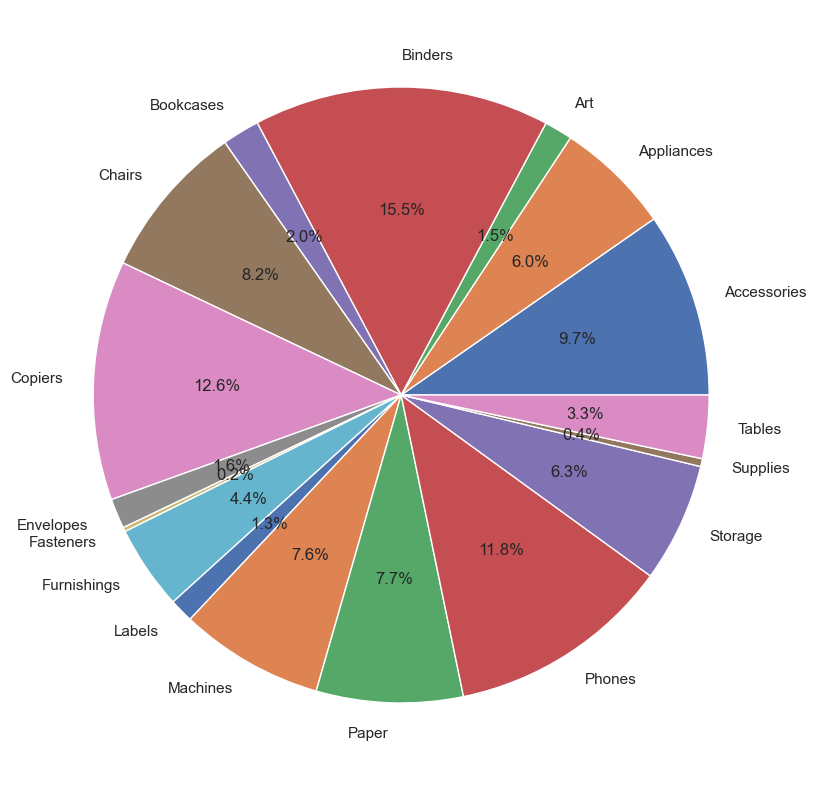

In [130]:
sub_grop = df[df['Profit'] >= 0].groupby('Sub-Category')['Profit'].agg('sum')
# print(seg_grop)
# state_grop.plot(kind='bar', figsize=(20, 8), rot=65)

plt.figure(figsize=(10,10))
plt.pie(sub_grop, labels = sub_grop.index.values, autopct='%1.1f%%')
plt.show()

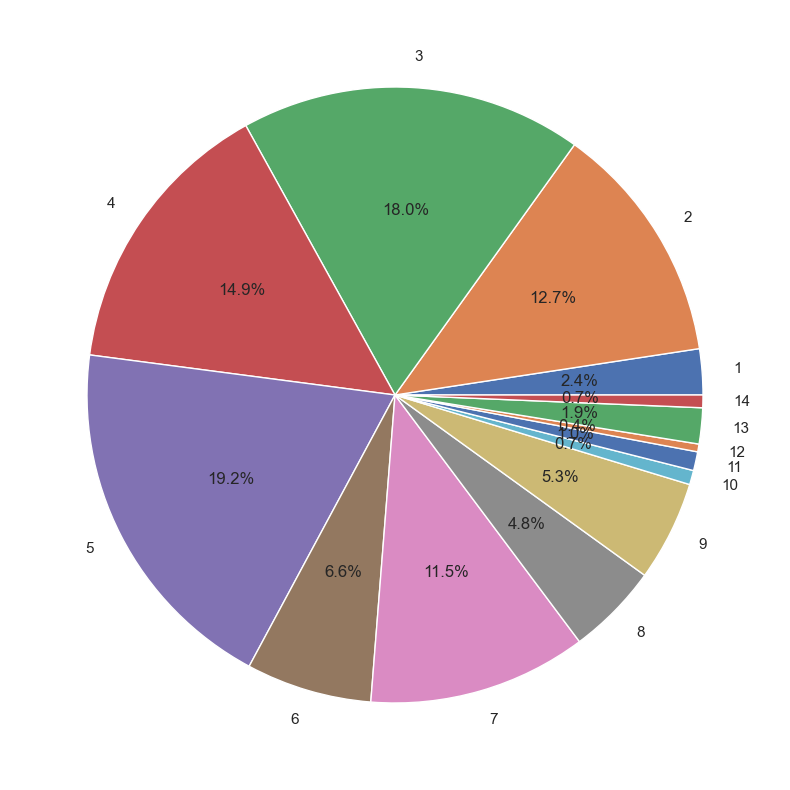

In [131]:
quant_grop = df[df['Profit'] >= 0].groupby('Quantity')['Profit'].agg('sum')
# print(seg_grop)
# state_grop.plot(kind='bar', figsize=(20, 8), rot=65)

plt.figure(figsize=(10,10))
plt.pie(quant_grop, labels = quant_grop.index.values, autopct='%1.1f%%')
plt.show()

- lastely we will do some analysis based on the discount column

### Here we can find some very important insights
- at a discount of 0.1 the sales and profit are increasing after that only the sales increase.
- at a discount of 0.5 the sales reach the maximun but the profit reachs the minimum.

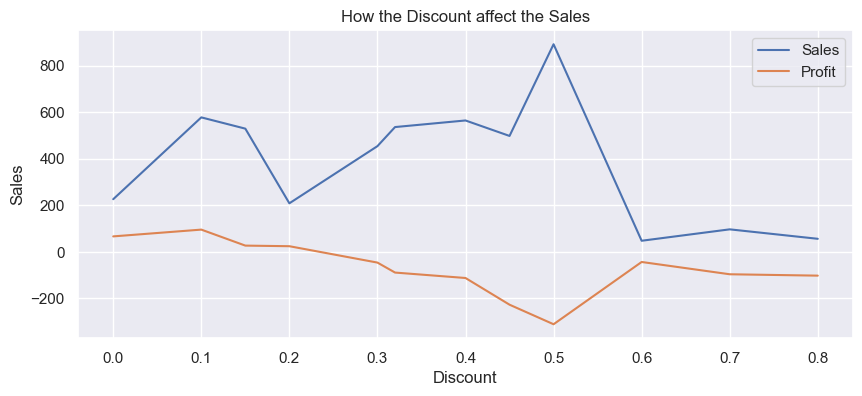

In [132]:
sns.lineplot(data=df, x='Discount', y='Sales', ci=None)
sns.lineplot(data=df, x='Discount', y='Profit', ci=None)
plt.title('How the Discount affect the Sales')
plt.legend(labels=['Sales', 'Profit'])

- Country column has just one value so it will be dropped.

In [133]:
df.drop('Country', axis=1, inplace=True)

## Splitting the data for the Preprocessing Step.
- Import the train_test_split function from the sklearn liberary
- split the data into features and targets sets.
- split the features and targets using the train_test_split into training and testing sets.

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X = df.drop('Profit', axis=1)
y = df['Profit']

# Data Preprocessing.

- Encoding the Categorical columns as the model will only accept numerical values.

In [136]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

## **Model Comparison**
- We can see how each model performed on the dataset.
- The XGBRegressor model is the model with the best Score. 

GRB -26.601257843112233 1.7943044161657709
SVR -57.06257332465492 5.545532357542242
ELSN -54.48329652408138 5.905895582877535
ByR -60.08577894099494 3.450172041851122
KernR -59.45364878872829 3.408329753121887
linr -60.442710127167814 3.3822654428747736
XGB -20.700243997592338 1.7642321870581468


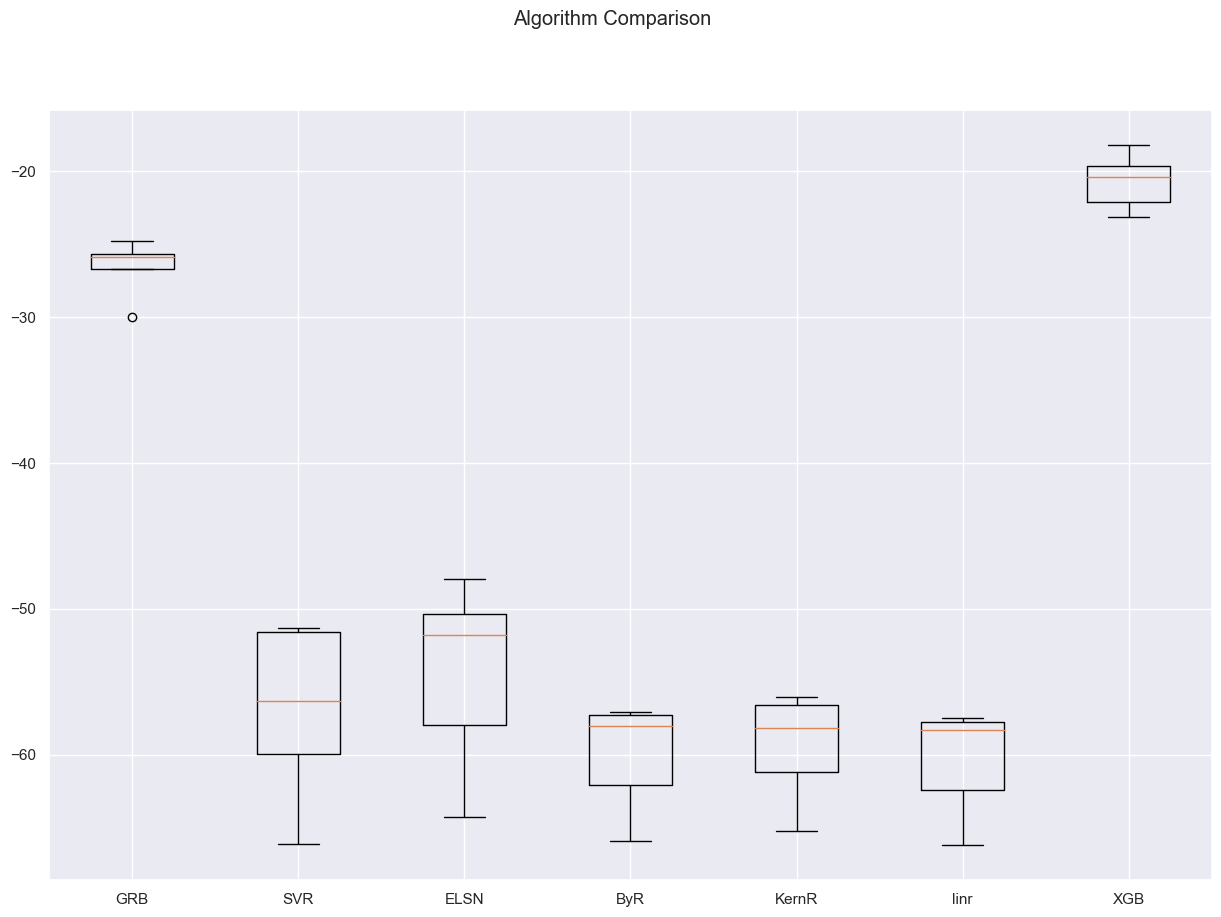

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold

models = [
    ('GRB', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('ELSN', ElasticNet()),
	('ByR', BayesianRidge()),
    ('KernR', KernelRidge()),
    ('linr', LinearRegression()),
    ('XGB', XGBRegressor())
]
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring = 'neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Model Creation and Evaluation
- Splitting the data using the train_test_split function
- Creating the model
- Fitting the model
- Predicting the X_test
- Evaluating the model using the mean_absolute_error function

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
final_model = XGBRegressor()

In [ ]:
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
pred = final_model.predict(X_test)

In [ ]:
print('the Score of the model is {}'.format(mean_absolute_error(y_test, pred)))

the Score of the model is 21.88000295726714
